***
## **1. sympy基础**
- sympy 的语法与python保持一致, 例如3x不能表达3与x相乘，二是写为3*x
- sympy 是开源免费的，体积小，不需要单独学习一门新的设计语言
- sympy 封装为python的一个库，引用十分方便
   - import sympy as sp
   - from sympy import *
   - from sympy import

========================================

1.单变量`symbol`的定义
>`x = symbols('x')`
>
2.多变量`symbol`的定义
>`x,y,z = symbols(x y z)`每个对象都有不同的变量名
>
>`x,y,z = symbols(x x z)`对象可能有相同的变量名
>
3.构造数学表达式
>定义完变量后->直接将一个公式赋给一个变量
>
4.将变量代入数学表达式`subs()`
>定义完变量后->定义完表达式后->`am = func.sub(symbols,value)`
>
>**注意:这里可以代入`多个值`,`字典(常用)`,'列表(不常用)'**
>
>============================
>
>**1.代入多个值:结果存在未知数(注意!!不会修改原始值,所以只能代入单变量,重新声明会换成另一个)**
>>```python
>>from sympy import symbols, sin, cos
>>x, y = symbols('x y')
>>expr = sin(x) + cos(y)
>>result = expr.subs(y, 0.5)
>>result = expr.subs(x, 0.5) #即使声明了两次
>># cos(y) + 0.479425538604203 #结果只会和单变量有关
>>```
>
>**2.代入字典:`key-value`体系很好**
>>```python
>>from sympy import symbols, sin, cos
>>x, y = symbols('x y')
>>expr = sin(x) + cos(y)
>>substitution_dict = {x: 0.5, y: 1}
>>result_multiple = expr.subs(substitution_dict)
>># 结果 0.390476753017442
>>```
>
>**3.代入列表(人为对齐/元组对齐)**
>>```python
>>from sympy import symbols, sin, cos
>>x, y, z = symbols('x y z')
>>expr = x**2 + y + z
>>symbols_list = [x, y, z]
>>values_list = [2, 3, 4]
>>result_list = expr.subs([(x, 2), (y, 3), (z, 4)])
>>result_list = expr.subs(symbols_list, values_list)
>># 结果 11
>>```
>
>
>=====================================================
>
5.(一次性操作)将修改数学表达式变量`subs`
>```python
>expr = cos(x) + 1
>expr.subs(x,y)
># cos(y)+1
>print(expr)
># 注意这里返回原式cos(x)+1.因为一次性操作
>```
>
6.判断相同`func1.equals(func2)`
>**sympy没有重载'=',而是使用了`equal()`**

In [1]:
from sympy import *
x + 1

NameError: name 'x' is not defined

这是因为python中如果不对一个变量进行定义是没有办法使用的。在sympy中也是一样，如果要使用一个符号x，必须要使用函数赋值

In [2]:
from sympy import *
x = symbols('x')  #通过面对对象的方式声明对象
x+1 # 返回一个表达式对象

x + 1

其中symbol()函数用于声明进行运算的符号，参数为string，并且使用空格隔开，比如

In [3]:
# 通过空格进行对象的生成
x, y, z = symbols('x y z')
print(x,y,z)

x y z


此处请注意 python 中的变量x和sympy的符号x是不同的，sympy中的符号可以赋予给python中不同的变量名，例如

In [4]:
# 可以使用多个变量表示同一个对象(一个用,一个原地记录)
x, y, z = symbols('x z z')
print(x,y,z)

x z z


基于sympy中的符号，我们可以构造数学中一般的数学表达式，例如

In [3]:
x = symbols('x')
exp = x + 1 #变量指向表达式,输出表达式
print(exp)

x + 1


如果想把某个具体的值代入到某个数学表达式，应该如何做呢？

In [19]:
# 并没有代入表达式
x = symbols('x')

expr = x + 1
x = 2
print(x)
print(expr)

# 通过subs代入表达式
x = symbols('x') #这里必须实时的创建对象?
a = expr.subs(x,2)
print(a)

2
x + 1
3


在此处expr已经成为数学表达式，而x=2只是赋予变量x为2，并没有改写表达式的内容，因此无法实现带入功能。正确方式应当是使用subs函数进行符号带入：

In [7]:
x = symbols('x')
expr = x + 1
a = expr.subs(x,2)
print(a)

3


python中的=号属于强内置操作符，因此sympy并没有尝试去改写，而是引入了==作为数学表达式中的等于符号，例如：

In [8]:
x = symbols('x')
print(x + 1 == 4)
a = (x+1)**2
b = x**2 + 2*x + 1
print(a == b)


# 判断代数意义上的相等需要使用equals
print(a.equals(b))

False
False
True


***
## 2. 基础操作

======================================

1.字符串转换为数学表达式`expr = sympify(str)`

2.估计数学表达式的值`expr.evalf()`
>`expr.evalf(chop=True))`消除浮点误差



======================================

2.1表达式带入（替换）
用于数学表达式中某些变量符号的替换
- 可以使用数字替换符号
- 可以使用另外一个表达式替换符号
- 可以同时对几个符号进行替换

In [9]:
from sympy import *
x, y, z = symbols("x y z")
expr = cos(x) + 1
# 计算实值
expr.subs(x,0)

2

In [10]:
expr = cos(x) + 1
# 替换现有对象
expr.subs(x,y)

cos(y) + 1

In [11]:
expr = x**3 + 4*x*y - z

# 注意subs的list表达式
expr.subs([(x, 2), (y, 4), (z, 0)])

40

===========================================================================

使用subs()进行符号替换时，返回的是一个新的数学表达式，原符号、原表达式都不会产生变化，例如

===========================================================================

In [12]:
expr = cos(x) + 1
print(expr.subs(x,x**y))
print(expr)
print(x)

cos(x**y) + 1
cos(x) + 1
x


其缘由是sympy里的数学表达式expr是不可修改的，无法通过内置函数来修改他们。

2.2将字符串转化为数学表达式

使用sympify()函数可以方便的将字符串转为sympy数学表达式

In [13]:
from sympy import *
x = symbols('x')
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
print(expr)
print(expr.subs(x, 2))

x**2 + 3*x - 1/2
19/2


In [14]:
expr=sqrt(8)
print(expr)

2*sqrt(2)


2.3 估计数字表达式的值

使用evalf()将数字表达式转换为浮点值，并且可以通过参数控制精度

In [15]:
expr = sqrt(8)
print(expr)
print(expr.evalf())

2*sqrt(2)
2.82842712474619


In [16]:
pi.evalf(42)

3.14159265358979323846264338327950288419717

有时由于计算机精度处理不够导致浮点错误，可以使用chop=True参数来消除误差，例如

In [17]:
one = cos(1)**2 + sin(1)**2
print((one - 1).evalf())
print((one - 1).evalf(chop=True))

-0.e-124
0


***
## 3. 输出与打印

=========================

1.(自动化美化)`init_printing()`初始化打印器后,再输入公式就会出现内容
>init_printing() 通过注册hook,拦截输出内容,然后使用格式化输出
>
2.切换输出格式
>**1.`String`**
>>`str(function)`
>
>**2.`latex`**
>>`latex(function)`
>
>**3.`pprint`**
>>`pprint(function)`


============================

3.1 输出器/打印器

有下列几种常用的打印器：
- str
- srepr
- ASCII pretty printer
- Unicode pretty printer
- LaTeX
- MathML
- Dot


打印之前通常使用init_printing()函数来初始化打印器，其将自动选择环境下最优的打印器。在不同的交互界面将会产生不同的绘制过程。

In [6]:
from sympy import *
init_printing()

In [7]:
x,y,z=symbols('x y z')
Integral(sqrt(1/x),x)

3.2 输出/打印函数

使用不同的输出函数有不同的输出效果

In [20]:
from sympy import *
x, y, z = symbols('x y z')
print(str(Integral(sqrt(1/x), x)))

Integral(sqrt(1/x), x)


In [21]:
print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


In [8]:
pprint(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [23]:
pprint(Integral(sqrt(1/x), x), use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


***
## 4. 化简表达式

====================================
1.函数化简`simplify(function)`
>某些表达式无法转换为直观意义上的最简式
>
>由于其属于遍历搜索，因此运行速度较慢
>
2.多项式有理式化简
>`expand(function)`展开函数
>
>`factor(function)`因式分解
>
>`collect(function)`合并同类项
>
>`cancel(function)`化简有理分式

====================================

4.1 通用化简式simplify()

sympy中有几十个用于化简数学表达式的函数，最常用的是simplify()函数，用于尝试将表达式参数化简为最简化的形式：

In [24]:
print(simplify(sin(x)**2 + cos(x)**2))

1


In [25]:
print(simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)))

x - 1


In [26]:
print(simplify(gamma(x)/gamma(x - 2)))

(x - 2)*(x - 1)


simplify()函数的缺点
- 某些表达式无法转换为直观意义上的最简式
- 由于其属于遍历搜索，因此运行速度较慢

In [27]:
print(simplify(x**2 + 2*x + 1))

x**2 + 2*x + 1


上述表达式的最简式应为$(x+1)^2$，然而simplify()判定$x+1$作为底要比$x$作为底更加复杂。但是纵使由以上缺点，simplify()依然是常用的表达式化简函数。

4.2 多项式/有理式化简

- expand() 是sympy里最常用的表达式展开函数

In [28]:
expand((x + 1)**2)

In [29]:
expand((x + 2)*(x - 3))

- factor() 常用于多项式的化简，用于解决因式分解。通常和expand()函数相对立。

In [30]:
factor(x**3 - x**2 + x - 1)

In [31]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [32]:
print(expand((cos(x) + sin(x))**2))
print(factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2))

sin(x)**2 + 2*sin(x)*cos(x) + cos(x)**2
(sin(x) + cos(x))**2


- collect()函数用于合并同类项

In [33]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
collect(expr, x)

- cancel()函数用于化简有理分式

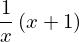

In [34]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

## 5. 微积分

- sympy提供了非常多用于积分计算的操作符，使用他们我们可以很方便的计算定积分和不定积分
- 使用之前应当初始化或优化python环境输出

================================

1.函数求导`diff(function,symbol)`
>`diff(cos(x), x)`
>
2.函数求多阶导`diff(function,symbol1,...symbol_n)`或者`diff(function,symbol(same),times)`
>`diff(x**4, x, x, x)`或者`diff(x**4, x, 3)`
>

================================

1.函数的不定积分`intergrate(function,symbol)`

2.函数的单重定积分`intergrate(function,(symbol,upper,lower))`

3.函数的多重定积分`intergrate(function,(symbol_1,upper,lower)...,(symbol_n,upper,lower))`

4.对于\infty 符号，使用'oo'来代替

================================

1.函数的极限`limit(function,symbol,num/infty,direction)`
>**解释:num/infty是极限点的取值,direction是方向:+/-/默认双侧**
>
>当极限不存在时，limit() 函数可能会返回 NaN (Not a Number) 或者像 AccumBounds(-1, 1) 这样的结果，表示极限在某个范围内震荡，而不是一个确定的值。  AccumBounds(-1, 1)  表明极限值在 -1 和 1 之间振荡。


In [35]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

5.1 函数求导

- 使用diff()函数进行函数求导

In [36]:
diff(cos(x), x)

In [37]:
diff(exp(x**2), x)

当使用diff()求多阶导数时，可以
- 依次指定求导的符号
- 指定求导符号和求导次数

In [38]:
diff(x**4, x, x, x)

In [39]:
diff(x**4, x, 3)

In [40]:
(x**4).diff(x,3)

同样的方法可以拓展到高阶混合偏导，例如：

In [41]:
expr = exp(x*y*z)
diff(expr, x, y, y, z, z, z, z)

In [42]:
diff(expr, x, y, 2, z, 4)

In [43]:
diff(expr, x, y, y, z, 4)

5.2 求积分

通常使用integrate()来求某个积分表达式
- 对于定积分，需要指定其上限、下限参数
- 对于不定积分，则无需指定上下限参数

In [44]:
integrate(cos(x),x)

In [45]:
integrate(cos(x), (x,0,1))

In [46]:
integrate(cos(x), (x,0,pi))

- 对于$\infty$符号，使用'oo'来代替

In [47]:
integrate(exp(-x), (x, 0, oo))

对于二重积分$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{-x^2-y^2}dxdy$也可以使用该函数进行计算

In [48]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

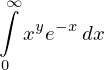

In [49]:
Integral(x**y*exp(-x), (x, 0, oo))

5.3 求极限

- 在sympy中使用limit()函数求下列极限 $\lim_{x \to +\infty}f(x)$

In [50]:
limit(sin(x)/x, x, 0)

- 在求一般多项式值时候，subs()可以代替limit()，但limit()更加常用于简短、不可导、无穷的情况：

In [51]:
expr = x**2/exp(x)
print(expr.subs(x, oo))
print(limit(expr,x,oo))

nan
0


***
## 6. 求解

1.定义等式`Eq(function_left,function_right)`

2.定义等式后对普通多项式求解`solveset(equation,symbol,domain)`
>**解释;symbol是要求解的符号变量,domain可以限制定义域**
>
>solveset()会返回一解集,解集类型取决于方程的解的情况(FiniteSet/ConditionSet/EmptySet)
>
3.微分方程求解`dsolve()`
>1.使用`Function('name')`定义微分方程,使用`symbols('name')`定义变量
>
>2.使用`diff(function,symbols,deriva-times)`表示f(x)的导数
>>(一阶导`diff(f(x),x)`,二阶导`diff(f(x),x,x)`)
>
>3.定义微分方程`Eq()`(其实是建立式右侧为0的等式)
>
>4.使用`dsolve(Eq_func,f(x))`解方程(注意这里的因变量是f(x)了)

 6.1 值的求解

- 在sympy中，使用Eq()来表示数学表达式中的'='符号

In [52]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
# 为了避免Python中的=的强表达性,使用Eq()
Eq(x, y)

- 进而使用solveset()函数对普通多项式进行求解
- 在solveset()函数默认第一个参数表达式=0

In [53]:
print(solveset(Eq(x**2, 1), x))
print(solveset(x**2 - 1, x))

{-1, 1}
{-1, 1}


 6.2 代数表达式求解

- 除了用于多项式值求解，solveset()函数还可以用于代数表达式的求解

In [54]:
solveset(x - x, x, domain=S.Reals)

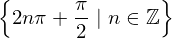

In [55]:
solveset(sin(x) - 1, x, domain=S.Reals)

In [56]:
solveset(exp(x), x)

- 对于线性多元方程求解，可以使用solveset系列的函数linsolve()

In [57]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

In [58]:
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

- 对于非线性多元方程，可以使用nonlinsolve()函数

In [59]:
a, b, c, d = symbols('a, b, c, d', real=True)
nonlinsolve([a**2 + a, a - b], [a, b])

In [60]:
nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

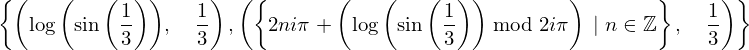

In [61]:
nonlinsolve([exp(x) - sin(y), 1/y - 3],  [x, y])

6.3 微分方程求解

- sympy 使用dsolve()函数来求解微分方程
- 需要指定cls=Function参数来生成函数符号对象

In [62]:
from sympy import *
init_printing()
x, y, z = symbols('x y z')
f, g = symbols('f g', cls=Function)
f(x)

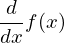

In [63]:
f(x).diff(x)

将常微分方程 $f''(x)-2f'(x)+f(x)=sin(x)$转化为sympy数学表达式：

In [64]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))

求解以上常微分方程：

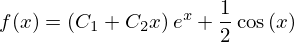

In [65]:
 dsolve(diffeq, f(x))

***
## 本节作业

利用sympy包的函数求解下列数学问题

### (1)

求解下列极限

$$\lim_{x\rightarrow 0}\frac{e-e^{\cos{x}}}{\sqrt[3]{1+x^2}-1}$$


### (2)

求下列二重积分，其中$D$为$x=1,x=2,xy=1,y=2$所围成的平面区域

$$\iint_D y e^{xy} dxdy $$ 


### (3)

求解下常微分方程，并利用其结果求在初始值$(0,\frac{1}{2})$及$(\frac{\pi}{2},\frac{1}{2}+\frac{\pi}{2})$处的解

$$y''+y=x$$

In [16]:
# 202318140413 周兴
# 题目1:求指定方程的极限
from sympy import *
x = symbols('x')
expr = (E - E**cos(x)) / ((1 + x**2)**(1/3) - 1)
result = limit(expr, x, 0)
print(f"{result}")

3*E/2


In [78]:
# 202318140413 周兴
# 题目2:求二重积分的解
x, y = symbols('x y')
func = y * exp(x*y)
# 图解法x先对y积分:x \in (1,2);y \in (1/x,2)
result = integrate(func,(y,1/x,2),(x,1,2))
print(f"result:{result}")

result:-exp(2) + exp(4)/2


**二重积分复习**

1.画出区域(x=1,x=2,xy=1,y=2)(是一个下边界圆滑的梯形)

2.垂直的细线进行扫描:$ \ $对于每个固定的x,下端始终在1/x上,上端始终在y=2上(dydx顺序)->内层y外层x

  $\quad$水平的细线进行扫描:$ \ $y在区域[1/2,1]和[1,2]需要分类讨论
  
3.根据得到的上下界代入sympy

In [81]:
# 202318140413 周兴
from sympy import *
import math
x = symbols('x')
y = Function('y')
C1, C2 = symbols('C1 C2') 
ode = Eq( y(x).diff(x, x)+y(x) , x)
result = dsolve(ode, y(x))
expr = result.rhs #得到通解方程右侧部分的主体

x_1 = 0
y_1 = Rational(1,2)
x_2 = pi/2
y_2 = Rational(1,2) + x_2

#特解:建立等式->根据已知点求C1,C2
C1_Eq = Eq(expr.subs(x,x_2),y_2)
C2_Eq = Eq(expr.subs(x,x_1),y_1)
solution = solve([C1_Eq, C2_Eq], [C1, C2])
C1_solution = solution[C1]
C2_solution = solution[C2]
result_solveset = result.subs([(C1,C1_solution),(C2,C2_solution)])

print(f"通解:{result}")
print(f"即:f(x) = {result.rhs}\n")
print(f"特解:{result_solveset}")
print(f"即:f(x) = {result_solveset.rhs}")

通解:Eq(y(x), C1*sin(x) + C2*cos(x) + x)
即:f(x) = C1*sin(x) + C2*cos(x) + x

特解:Eq(y(x), x + sin(x)/2 + cos(x)/2)
即:f(x) = x + sin(x)/2 + cos(x)/2
